In [1]:
from datetime import datetime
import tensorflow as tf
import importlib
import numpy as np



In [17]:
# import config 
import configs.config
importlib.reload(configs.config)
from configs.config import CFG
from utils import config
config = config.Config.from_json(CFG)

## Create Dataset

In [28]:
# create Train Series and Dataset 
import dataloader.dataloader
importlib.reload(dataloader.dataloader)
from dataloader.dataloader import Train_Series,Dataset
try: 
    del series,ds
except:
    pass

series = Train_Series(config.data,config.paths)
series.createSeries()
ds = Dataset(series)
ds.split_dataset()

X_train = ds.X_train
y_train = ds.y_train
X_test = ds.X_test
y_test = ds.y_test

X_train.shape

(6668, 160, 2)

## Save Datset to Files 

In [29]:
import pickle
# Include the epoch in the file name (uses `str.format`)
ds_path = "./model/saved_ds/ds.obj"

with  open(ds_path,'wb') as file:
    exampleObj = pickle.dump(ds,file)


In [ ]:
import dataloader.dataloader
importlib.reload(dataloader.dataloader)
from dataloader.dataloader import Test_Series
try: 
    del test_series
except:
    pass
test_series = Test_Series(config.data,config.paths)
test_series.createSeries()

## Call model and compile

In [30]:
from model.model1D import Unet,Unet_Model
import model.model1D
importlib.reload(model.model1D)
try: 
    del unet
except:
    pass

unet = Unet(n_classes=3,n_filters=8)
unet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
unet.model((160,2)).summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 160, 2)]     0           []                               
                                                                                                  
 downsampling_block_10 (Downsam  ((None, 80, 8),     256         ['input_3[0][0]']                
 plingBlock)                     (None, 160, 8))                                                  
                                                                                                  
 downsampling_block_11 (Downsam  ((None, 40, 16),    1184        ['downsampling_block_10[0][0]']  
 plingBlock)                     (None, 80, 16))                                                  
                                                                                            

## Train Model and save weights and model to files

In [31]:
from datetime import datetime
#train model
history = unet.fit(X_train,y_train,epochs = 100)


# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "model/weights/cp-{epoch:04d}.ckpt"
# save weights 
unet.save_weights(checkpoint_path.format(epoch=100))
#save model
models_path = "model/saved_models/unet_{version}_{now}"
unet.save(models_path.format(version = "v1", now = str(datetime.now().date())))

Epoch 1/100
209/209 [==============================] - 7s 18ms/step - loss: 1.0994 - accuracy: 5.1084e-04
Epoch 2/100
209/209 [==============================] - 4s 19ms/step - loss: 1.0986 - accuracy: 0.0000e+00
Epoch 3/100
209/209 [==============================] - 4s 18ms/step - loss: 1.0986 - accuracy: 0.0000e+00
Epoch 4/100
209/209 [==============================] - 4s 19ms/step - loss: 1.0986 - accuracy: 0.0000e+00
Epoch 5/100
209/209 [==============================] - 4s 19ms/step - loss: 1.0986 - accuracy: 0.0000e+00
Epoch 6/100
209/209 [==============================] - 4s 21ms/step - loss: 1.0986 - accuracy: 0.0000e+00
Epoch 7/100
209/209 [==============================] - 4s 20ms/step - loss: 1.0986 - accuracy: 0.0000e+00
Epoch 8/100
209/209 [==============================] - 4s 20ms/step - loss: 1.0986 - accuracy: 0.0000e+00
Epoch 9/100
209/209 [==============================] - 4s 21ms/step - loss: 1.0986 - accuracy: 0.0000e+00
Epoch 10/100
209/209 [========================

INFO:tensorflow:Assets written to: model/saved_models/unet_v1_2023-09-30\assets


INFO:tensorflow:Assets written to: model/saved_models/unet_v1_2023-09-30\assets


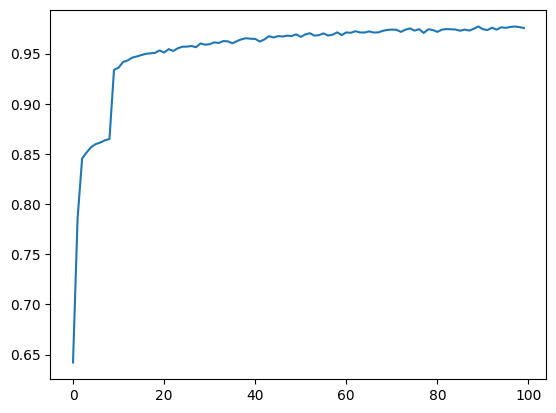

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history["accuracy"])

In [18]:
def accuracy(real,pred):
    comp = real == pred
    return np.sum(comp)/(comp.shape[0]*comp.shape[1])


y_train_pred = unet.predict(X_train)
print("train accuracy : " + str(accuracy(y_train,y_train_pred)))


y_test_pred = unet.predict(X_test)
print("test accuracy : " +  str(accuracy(y_test,y_test_pred)))

In [167]:
from IPython.display import FileLink
import pandas as pd

# import os
# os.chdir(r'kaggle/working')'
filename = 'train_' +'.csv'
pd.DataFrame(test_mask).to_csv(filename)

FileLink(filename)



ValueError: Must pass 2-d input. shape=(51, 8640, 3)